In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("Machine Learning\cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.drop(columns=["ID"], inplace=True)

In [13]:
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [14]:
df.iloc[:,-1].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

<Axes: xlabel='Clump', ylabel='MargAdh'>

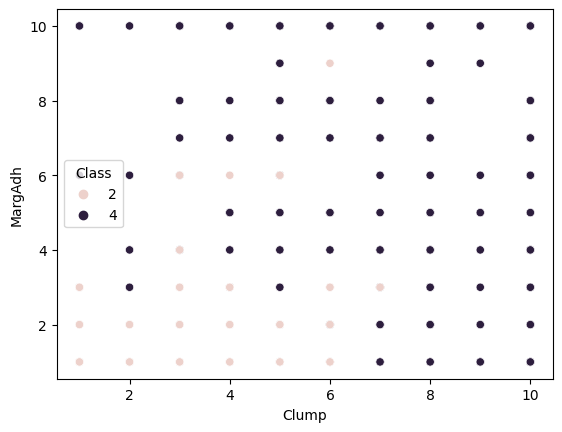

In [22]:
sns.scatterplot(df,x = df["Clump"], y = df["MargAdh"], hue = 'Class')

In [33]:
X = df[["Clump", "MargAdh"]]
y = df.iloc[:,-1]

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [26]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [27]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [35]:

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.93
rf 0.92
knn 0.9


In [36]:
from sklearn.ensemble import VotingClassifier

### Hard Voting

In [37]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.92


### Soft Voting

In [38]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
